$$
-\frac{\hbar^2}{2m}\left(\frac{\partial^2\phi}{\partial x^2}+\frac{\partial^2\phi}{\partial y^2}\right)+ V(x,y)\phi = E\phi
$$

$\phi(x,y)$ represented discretely is a grid, but we "flatten" it to make it a vector. So is the potential $V$.

The Kronecker sum is $A\bigoplus B = A\bigotimes I + I\bigotimes B$

We have $(-\frac{\hbar^2}{2m\Delta x^2}(D\bigoplus D) + I\vec{V})\vec{\phi} = E\vec{\phi}$ where D is a tridiagonal matrix of main diagonal -2 and off diagonal 1.

In [2]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')
from scipy import sparse

In [6]:
N = 150
X, Y = np.meshgrid(np.linspace(0,1,N,dtype=float),np.linspace(0,1,N,dtype=float))

In [29]:
dx = 1/N

In [42]:
V = np.zeros(len(X)*len(Y))

In [28]:
diag = np.ones(N)
D = sparse.spdiags([diag, diag*-2,diag],[-1,0,1],N,N)

In [47]:
H = -sparse.kronsum(D,D)/dx**2 + sparse.diags(V.flatten(),0)

In [84]:
numbers_to_solve = 20

In [85]:
eigenval, eigenvec = eigsh(H, k=20, which='SM')

In [68]:
def eigenstate(i):
    return eigenvec.T[i].reshape(N,N)

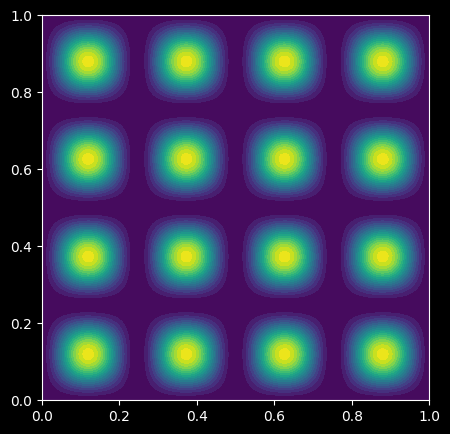

In [99]:
plt.figure(figsize=(5,5))
plt.contourf(X, Y, eigenstate(19)**2, 20)

<BarContainer object of 20 artists>

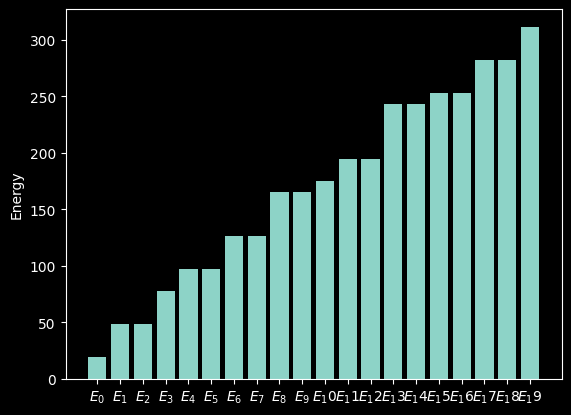

In [86]:
plt.ylabel('Energy')
plt.bar([f'$E_{i}$' for i in range(numbers_to_solve)],eigenval)

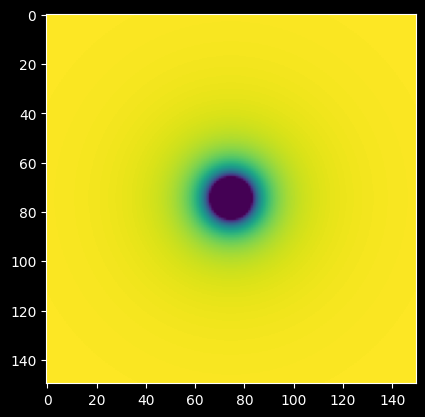

In [146]:
V = np.clip(-1/((X-0.5)**2+(Y-0.5)**2),-300,300)
plt.imshow(V)

In [150]:
diag = np.ones(N)
D = sparse.spdiags([diag, diag*-2,diag],[-1,0,1],N,N)
H = -sparse.kronsum(D,D)/dx**2 + sparse.diags(V.flatten(),0)
n = 20
eigenval, eigenvec = eigsh(H, k=n, which='SM')

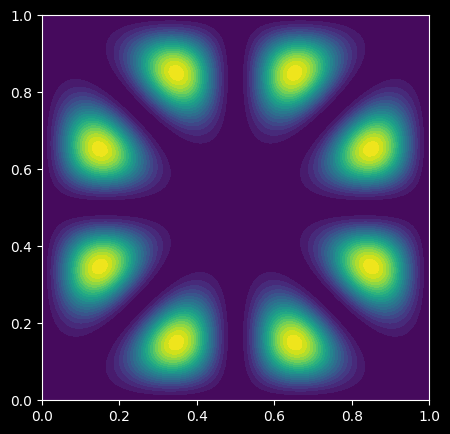

In [181]:
plt.figure(figsize=(5,5))
plt.contourf(X, Y, eigenstate(12)**2, 20)

<BarContainer object of 20 artists>

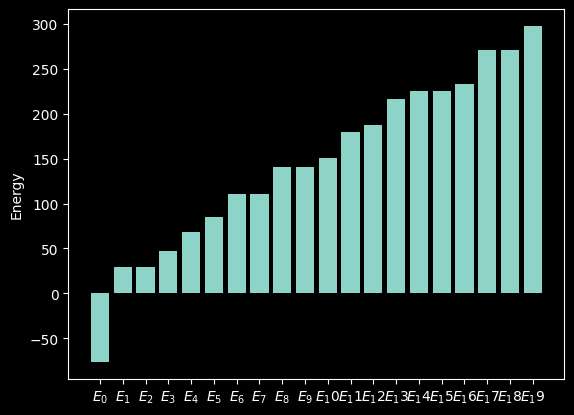

In [152]:
plt.ylabel('Energy')
plt.bar([f'$E_{i}$' for i in range(n)],eigenval)